In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn.utils import shuffle
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt


In [2]:
def print_accuracy(differences):
    length = len(differences)

    print("Accurate +-0 cat: " + str((differences.count([0])/length)*100))

    plusminusone = differences.count([0]) + differences.count([1]) + differences.count([-1])
    print("Accurate +-1 cat: " + str((plusminusone/length)*100))

    plusminustwo = plusminusone + differences.count([2]) + differences.count([-2])
    print("Accurate +-2 cat: " + str((plusminustwo/length)*100))

In [3]:
def plot_normalized_numerical_data(data_column, title, bin_size, light_mode= True):
    minlength = min(data_column.values)
    maxlength = max(data_column.values)
    bins = int((maxlength - minlength)/bin_size)+1
    differences =pd.to_numeric(data_column, errors='coerce')
    if light_mode:
        plt.title(title)
        differences.hist(bins=bins, weights = np.ones(len(data_column))/(len(data_column)*bin_size))
    else:
        plt.style.use(['dark_background'])
        fig = plt.figure()
        fig, ax = plt.subplots(nrows=1, ncols=1)
        plt.title(title)
        plt.hist(differences,bins=bins,weights = np.ones(len(data_column))/(len(data_column)*bin_size),  color="#17c264", align="mid")

        fig.patch.set_facecolor('#23293b')
        ax.set_facecolor('#23293b')
        plt.show()

In [4]:
def show_results(y_test,y_pred, title, bin_size,light_mode=True):
    differences = []
    for el1, el2 in zip(y_test,y_pred):
        differences.append([(el1-el2)])
    dif_df = pd.DataFrame(differences, columns = ['Difference'])
    
    print_accuracy(differences)
    
    # plot normalized
    data_column = dif_df['Difference']
    plot_normalized_numerical_data(data_column, title, bin_size,light_mode)
    

In [5]:
df = pd.read_csv("Data/train_data.csv")


In [6]:
X = df[df.columns.difference(['WilksRangeCat', 'Wilks', 'WilksRange', 'Date', 'Equipment', 'Unnamed: 0'])]
y = df.WilksRangeCat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
print(len(X_test))
X.columns

76731


Index(['Age', 'BodyweightKg', 'Day', 'Month', 'PreviousComps', 'Sex', 'Tested',
       'Weekday', 'Year'],
      dtype='object')

# KMeans

In [7]:
cluster_assignments = KMeans(n_clusters=14,random_state=1).fit_predict(df[df.columns.difference(['WilksRangeCat', 'Wilks', 'WilksRange', 'Date'])])

In [8]:
df['PredictedCat'] = cluster_assignments

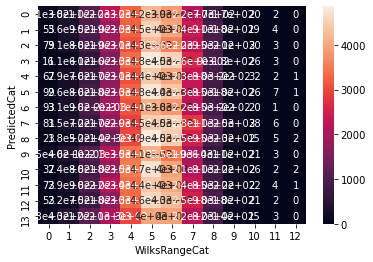

In [9]:
import seaborn as sns
tab = pd.crosstab(df['PredictedCat'],df['WilksRangeCat'])
sns.heatmap(tab,annot=True,annot_kws={"size": 10})
plt.show()

# DecisionTree

In [10]:
model_dtc = tree.DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
y_dtc_pred = model_dtc.predict(X_test)

Accurate +-0 cat: 28.920514524768347
Accurate +-1 cat: 69.38786149014088
Accurate +-2 cat: 89.49186117735987


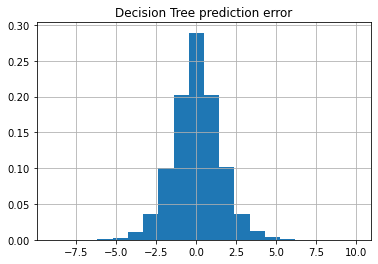

In [11]:
show_results(y_test,y_dtc_pred, "Decision Tree prediction error", 1)    

# KNN

In [12]:
model_knn= KNeighborsClassifier(n_neighbors=200, p=1 )
model_knn.fit(X_train, y_train)
y_knn_pred = model_knn.predict(X_test)

Accurate +-0 cat: 32.50837340840078
Accurate +-1 cat: 76.70693722224394
Accurate +-2 cat: 94.14317550924659


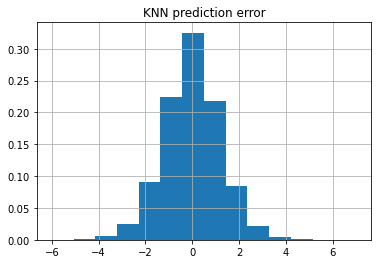

In [13]:
show_results(y_test,y_knn_pred, "KNN prediction error", 1)

# RandomForest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model_rfc = RandomForestClassifier(n_estimators = 500)
model_rfc.fit(X_train, y_train)
y_rfc_pred = model_rfc.predict(X_test)

In [16]:
best_fitted_model = model_rfc

Accurate +-0 cat: 36.316482256193716
Accurate +-1 cat: 79.42682879149235
Accurate +-2 cat: 94.98898750179198


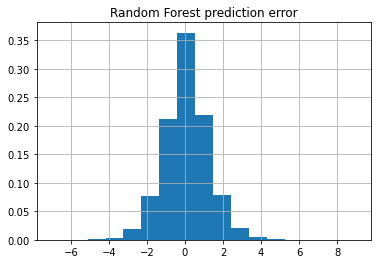

In [17]:
show_results(y_test,y_rfc_pred, "Random Forest prediction error", 1)

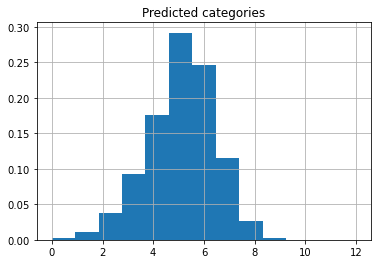

In [18]:
y_rfc_pred_df = pd.DataFrame(y_rfc_pred, columns = ['Predicted'])
plot_normalized_numerical_data(y_rfc_pred_df['Predicted'],"Predicted categories",1)

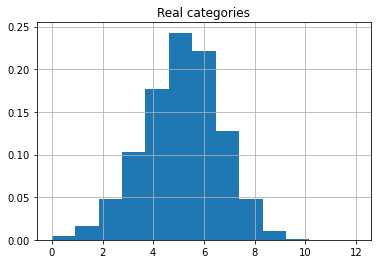

In [19]:
plot_normalized_numerical_data(y_test,"Real categories",1)

#  ExtraTreesClassifier

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
model_rtc = ExtraTreesClassifier(n_estimators = 200)
model_rtc.fit(X_train, y_train)
y_rtc_pred = model_rtc.predict(X_test)

Accurate +-0 cat: 35.557988296777054
Accurate +-1 cat: 78.08447693891647
Accurate +-2 cat: 94.40512960863275


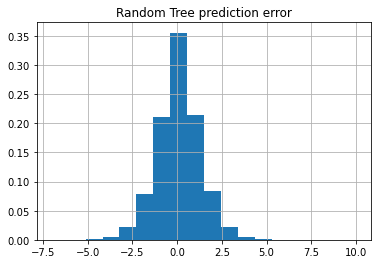

In [22]:
show_results(y_test,y_rtc_pred, "Random Tree prediction error", 1)

# RandomForestRegressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 

In [24]:
model_rfr = RandomForestRegressor(n_estimators = 10)
model_rfr.fit(X_train, y_train)
y_rfr_pred = model_rfr.predict(X_test)

rmse = mean_squared_error(y_test,y_rfr_pred, squared=False)
mse = mean_squared_error(y_test,y_rfr_pred, squared=True)
print(mse)
print(rmse)

1.3918774046885307
1.1797785405272172


Accurate +-0 cat: 3.711668035083604
Accurate +-1 cat: 8.25220575777717
Accurate +-2 cat: 9.671449609675358


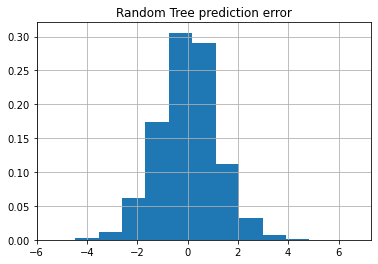

In [25]:
show_results(y_test,y_rfr_pred, "Random Tree prediction error", 1)

# Lasso

from sklearn.linear_model import Lasso

lassoM  = Lasso(alpha=0.001).fit(X_train,y_train)
y_pred = lassoM.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Ridge

from sklearn.linear_model import Ridge

ridgeM = Ridge(alpha=0.1).fit(X_train,y_train)
y_pred = ridgeM.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(multi_class='multinomial')
model_lr.fit(X_train, y_train)
y_lr_pred = model_lr.predict(X_test)

C:\Users\tvaino\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accurate +-0 cat: 26.06769102448815
Accurate +-1 cat: 66.58847141311855
Accurate +-2 cat: 87.93316912330089


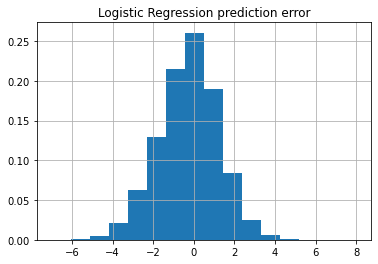

In [27]:
show_results(y_test,y_lr_pred, "Logistic Regression prediction error", 1)

# SVM

from sklearn.svm import SVC

svm_1 = SVC(kernel='linear', decision_function_shape='ovr').fit(X_train, y_train)
y_pred = svm_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

svm_poly_1 = SVC(kernel='poly', degree=2, gamma='auto', decision_function_shape='ovr').fit(X_train, y_train)
y_pred = svm_poly_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

svm_rbf_1 = SVC(kernel='rbf', gamma='auto', decision_function_shape='ovr').fit(X_train, y_train)
y_pred = svm_rbf_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


model = SVC(decision_function_shape='ovo')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


model = SVC(decision_function_shape='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Final model

In [28]:
df_test = pd.read_csv("Data/test_data.csv")
X_final_test = df_test[df_test.columns.difference(['WilksRangeCat', 'Wilks', 'WilksRange', 'Date', 'Equipment', 'Unnamed: 0'])]
y_final_test = df_test.WilksRangeCat

# Predicting test data set
y_final_pred = best_fitted_model.predict(X_final_test)
print("Accuracy:",metrics.accuracy_score(y_final_test, y_final_pred))

Accuracy: 0.3616442855057656


Accurate +-0 cat: 36.16442855057656
Accurate +-1 cat: 79.67085097066122
Accurate +-2 cat: 94.92774777404759


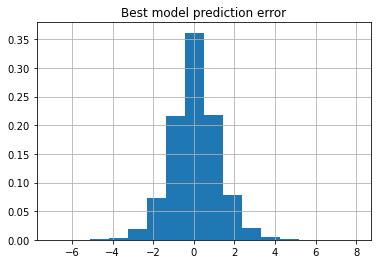

In [29]:
show_results(y_final_test,y_final_pred, "Best model prediction error", 1)

1. feature 1 (0.274328)
2. feature 0 (0.207130)
3. feature 2 (0.145861)
4. feature 8 (0.115602)
5. feature 3 (0.101042)
6. feature 4 (0.083297)
7. feature 7 (0.044528)
8. feature 5 (0.015004)
9. feature 6 (0.013208)
0 : Age
1 : BodyweightKg
2 : Day
3 : Month
4 : PreviousComps
5 : Sex
6 : Tested
7 : Weekday
8 : Year


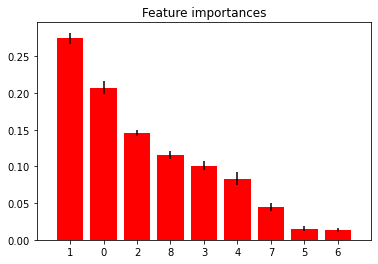

In [30]:
importances = best_fitted_model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)"  % (f + 1, indices[f], importances[indices[f]]))
    
for i in range(len(X_train.columns)):
    print(i, ":", X_train.columns[i])
    
std = np.std([tree.feature_importances_ for tree in best_fitted_model.estimators_],
             axis=0)

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()